<a href="https://colab.research.google.com/github/darsini-k22/AI_Worksheets/blob/main/data_genie_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [854]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# Data preprocessing


In [855]:
df1=pd.read_csv('sample_1.csv',index_col=[0],parse_dates=True)
df2=pd.read_csv('sample_2.csv',index_col=[0],parse_dates=True)
df3=pd.read_csv('sample_3.csv',index_col=[0],parse_dates=True)
df4=pd.read_csv('sample_4.csv',index_col=[0],parse_dates=True)
df5=pd.read_csv('sample_5.csv',index_col=[0],parse_dates=True)
df6=pd.read_csv('sample_6.csv',index_col=[0],parse_dates=True)
df7=pd.read_csv('sample_7.csv',index_col=[0],parse_dates=True)
df8=pd.read_csv('sample_8.csv',index_col=[0],parse_dates=True)
df9=pd.read_csv('sample_9.csv',index_col=[0],parse_dates=True)
df10=pd.read_csv('sample_10.csv',index_col=[0],parse_dates=True)


### Outlier detection

In [856]:
def outlier_detect_drop(df):
  out = LocalOutlierFactor(n_neighbors=2)
  labels = out.fit_predict(df)
  outlier_indices = []
  print(outlier_indices)

  if(len(outlier_indices)>0):
    for i in range(len(labels)):
      if labels[i] == -1:
        outlier_indices.append(i)

    if outlier_indices:
      df.drop(df.index[outlier_indices], inplace=True)
  



## Transformation

In [857]:
from sklearn.metrics import mean_squared_error
std_scaler = StandardScaler()
def transformation(df):
  
  dataset_std = pd.DataFrame(index=df.index, columns=df.columns)

  for col in df.columns:
    dataset_std[col] = std_scaler.fit_transform(df[col].values.reshape(-1, 1)).ravel()
    
  dataset_std.head()
  return dataset_std


#Feature Extraction

In [858]:
def preprocessing(df):
  df.dropna(axis=1,inplace=True,how='all')
  temp=df
  temp=temp.astype('str')
  temp.dtypes
  colum=[]

  #searching for column with time stamp like columns
  for col in temp.columns:
      try:
          temp[col] = pd.to_datetime(temp[col])
          print(temp[col].dtype)
          if temp[col].dtype == 'datetime64[ns]' or temp[col].dtype == 'datetime64[ns, UTC]' :
            colum.append(col)
            print(f'Column "{col}" contains timestamp-like values')
      except:
          pass
  print(colum)
  df[colum[0]] = pd.to_datetime(df[colum[0]])

  df[colum[0]].dt.tz_localize(None)

  #making timestamp column as index
  if len(colum)>0:
    for c in colum:
      df[c]=pd.to_datetime(df[c],infer_datetime_format=True)
    df=df.set_index([colum[0]])

  #dropping column with index NaT
  df = df.loc[df.index.notna()]

  #sorting the data by timestamp
  df.sort_index(inplace=True)
  
  #filling NaN values with interpolation method
  
  for col in df.columns:
    df[col]=df[col].interpolate(method="linear")
  
  df.fillna(0,inplace=True)

  #dropping outliers
  outlier_detect_drop(df)

  #resampling in daily basis
  resampled_data=df.resample('D').mean()
  resampled_data=resampled_data.interpolate(method="linear")

  #transformation 
  dataset_stand=transformation(resampled_data)
  return dataset_stand



In [859]:
dataset_stand1=preprocessing(df1)
dataset_stand2=preprocessing(df2)
dataset_stand3=preprocessing(df3)
dataset_stand4=preprocessing(df4)
dataset_stand5=preprocessing(df5)
dataset_stand6=preprocessing(df6)
dataset_stand7=preprocessing(df7)
dataset_stand8=preprocessing(df8)
dataset_stand9=preprocessing(df9)
dataset_stand10=preprocessing(df10)

datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]
datetime64[ns]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]


In [860]:
from scipy.stats import entropy

def unpredictability(data):
    prob = np.histogram(data.values, bins=10, density=True)[0]
    entropy_value = entropy(prob)
    return entropy_value


In [861]:
def trend_infer(data):
  mean_diff = data.diff().mean()[0]
  if mean_diff > 0:
      trend_direction = 1
  elif mean_diff<0:
      trend_direction = -1
  else:
      trend_direction = 0

  return trend_direction, abs(mean_diff)


In [862]:
from statsmodels.tsa.stattools import acf

def calc_lag(data):
    acf_vals, confint = acf(data, nlags=50, alpha=0.05)
    cyclic = np.where(acf_vals > confint[:, 1])[0]
    seasonal = np.where(acf_vals > confint[:, 0])[0][1:]
    if cyclic.size == 0:
        cyclic_val = 0
    else:
        cyclic_val = cyclic[0]
    if seasonal.size == 0:
        seasonal_val = 0
    else:
        seasonal_val = seasonal[0]
    return cyclic_val, seasonal_val



In [863]:
datasets = [dataset_stand1, dataset_stand2, dataset_stand4, dataset_stand5, dataset_stand6, dataset_stand8, dataset_stand9, dataset_stand10]

results = []

for i, dataset in enumerate(datasets, 1):
    tdir, tchange_rate = trend_infer(dataset)
    results.append(['s' + str(i), unpredictability(dataset), tdir, tchange_rate])

columns=['name','unpred','t_dir','tchange_rate']

df = pd.DataFrame(results, columns=columns)
df.set_index('name',inplace=True)


In [864]:
df.head(5)

,unpred,t_dir,tchange_rate
name,,,
s1,1.748524,1,0.057283
s2,1.609438,1,0.428780
s3,0.849990,1,0.098716
s4,2.113665,1,0.000811
s5,2.113665,1,0.000811


In [865]:
df0=pd.read_csv('sample_0.csv',index_col=[0],parse_dates=True)
dataset_stand0=preprocessing(df0)

datetime64[ns, UTC]
Column "point_timestamp" contains timestamp-like values
['point_timestamp']
[]


In [866]:
dataset_stand0

,point_value
point_timestamp,
2009-01-01 00:00:00+00:00,2.308917
2009-01-02 00:00:00+00:00,2.255349
2009-01-03 00:00:00+00:00,2.201782
2009-01-04 00:00:00+00:00,2.148214
2009-01-05 00:00:00+00:00,2.094647
...,...
2020-12-28 00:00:00+00:00,-1.814562
2020-12-29 00:00:00+00:00,-1.812027
2020-12-30 00:00:00+00:00,-1.809491


In [867]:
tdir,tchange_rate=trend_infer(dataset_stand0)
col=['name','unpred','t_dir','tchange_rate','cluster']
sample0=pd.DataFrame([['s0',unpredictability(dataset_stand0),tdir,tchange_rate,0]],columns=col)
sample0.set_index('name',inplace=True)
sample0.head()


,unpred,t_dir,tchange_rate,cluster
name,,,,
s0,2.090887,-1,0.000938,0


In [868]:
sample0['cluster']=0

# Feature Selection

## K Means cluster

In [869]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

[0 0 2 0 0 1 0 1]


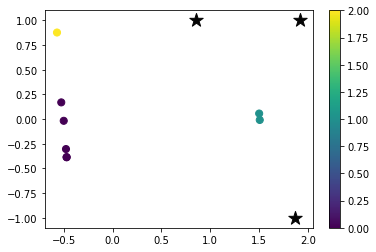

In [870]:
kmeans_model = KMeans(n_clusters=3)
data = df

kmeans_model.fit(data)

labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_
print(labels)

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.iloc[:, :3])

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505', zorder=10)

plt.colorbar(scatter)

plt.show()


In [871]:
df['cluster']=labels

In [872]:

new_label = kmeans_model.predict(sample0)
sample0['cluster'] = new_label

new_kmeans_model = KMeans(n_clusters=3)
new_kmeans_model.fit(sample0)

new_predictions = new_kmeans_model.predict(new_data)


ValueError: ignored

In [ ]:
df.append(sample0)

In [ ]:
modelA=df[df['cluster'].values==0]
modelB=df[df['cluster'].values==1]
modelC=df[df['cluster'].values==2]

In [ ]:
print(modelA)

In [ ]:
print(modelB)

In [ ]:
print(modelC)

In [ ]:
df.head()

## Testing stationarity

In [ ]:
def adjust_stationarity(dataset_trans):
  diff_trans_shift=dataset_trans-dataset_trans.shift(1)
  diff_trans_shift.dropna(inplace=True)
  return diff_trans_shift

In [ ]:
#check for stationarity

from statsmodels.tsa.stattools import adfuller
def test_stationarity(dataset,window=12):
  # print(dataset)
  #rolling stat test
  moving_avg=dataset.rolling(window=window).mean()
  moving_std=dataset.rolling(window=window).std()

  moving_avg.dropna(inplace=True)
  moving_std.dropna(inplace=True)
  plt.clf()
  plt.plot(dataset,color='black',label="Original value")
  plt.plot(moving_avg,color='red',label="Moving average")
  plt.plot(moving_std,color='blue',label="Moving std")
  plt.legend()
  

  #adfc test
  adfctest=adfuller(dataset,autolag='AIC')
  adfcoutput=pd.Series(adfctest[0:4],index=['Test Statistic','p-value','#lags used','No.of observation used'])
  for key,value in adfctest[4].items():
    adfcoutput['Critical Value (%s)' %key]=value
  

  print(adfcoutput)

  if adfcoutput[1]<=0.05:
    print("Strong evidence against null hypothesis, reject null hypo")
    return adfctest[2]
  else:
    print("Weak evidence against null hypothesis, accept null hypo")
    return 0
      
#test stat must be greater than the critical values to accept null hypothesis
#null hypo: dataset is not stationary

# Model Training

## ARIMA

In [ ]:
dataset_stand1

In [ ]:
dataset_stand1.tail(5)

In [ ]:
new_data=pd.DataFrame([['2022-10-13',513.48067],['2022-10-14',444.48897],['2022-10-15',384.7167]],columns=['point_timestamp','point_value'])
new_data.set_index('point_timestamp')
data_stand=preprocessing(new_data)

In [ ]:
data_stand.head()

In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from pmdarima.arima import auto_arima

def arima_model(train_data, test_data,period):
    diff_data = train_data.diff().dropna()
    arima_model = auto_arima(diff_data, start_p=0, start_q=0, max_p=5, max_q=5,seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)
    p, d, q = arima_model.order

    model = ARIMA(diff_data, order=(p,d,q))
    results = model.fit()

    periods = len(test_data)+period
    forecast = results.forecast(steps=periods)

    if period > 1:
        pred = forecast[-period:]
    else:
        pred = [forecast[0]]

    y_pred = pred[-len(test_data):]
    y_true = test_data.values[-len(y_pred):]

    mape = mean_absolute_percentage_error(y_true, y_pred)

    # Generate dates for the forecast period
    last_date = test_data.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=period, freq='D')

    return {'name':'ARIMA', 'mape':mape, 'pred':pred, 'forecast_dates':forecast_dates}


In [ ]:
print(arima_model(dataset_stand1,data_stand,5))

## Prophet Model

In [ ]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error

def prophet_model(train_data, test_data, period):
    train_data = train_data.reset_index()
    train_data.columns = ['ds', 'y']
    m = Prophet(interval_width=0.95, daily_seasonality=True)
    model = m.fit(train_data)

    future = m.make_future_dataframe(periods=len(test_data)+period, freq='D', include_history=False)
    forecast = m.predict(future)

    y_pred = forecast[-len(test_data):]['yhat'].values
    y_true = test_data.values[-len(test_data):]
    
    # y_pred=scalar.inverse_transform(y_pred)
    # y_true=scalar.inverse_transform(y_true)

    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {'name': 'PROPHET', 'mape': mape, 'pred': forecast['yhat'].values}


In [ ]:
print(std_scaler.inverse_transform(prophet_model(dataset_stand1,data_stand, 10)['pred'].reshape(-1,1)))

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [ ]:
def holt_linear_trend_forecast(train_data, test_data, forecast_period):
    # Fit the model
    model = Holt(train_data).fit()
    
    # Make the forecast
    y_pred = model.forecast(len(test_data)+forecast_period)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(test_data, y_pred[:len(test_data)])
    
    return {'name':"Holt's Linear Trend Method",'mape': mape,'pred': y_pred}

In [ ]:
holt_linear_trend_forecast(dataset_stand1,data_stand, 10)

In [ ]:

def inverse_transform(data):
  destandardized_value = scalar.inverse_transform(data)
  return destandardized_value


In [ ]:
data_stand.mean()

In [ ]:
modelA

In [ ]:
modelB

In [ ]:
modelC

In [ ]:
modelBds=dataset_stand1

In [ ]:
modelAds=dataset_stand9

In [ ]:
dataset_stand9

In [ ]:
def model_select(train,test,period):
  mape_arima=arima_model(train,test,0)['mape']
  mape_prophet=prophet_model(train,test,0)['mape']
  mape_holt=holt_linear_trend_forecast(train,test,0)['mape']
  min_mape = min(mape_arima, mape_prophet, mape_holt)

  if min_mape == mape_arima:
      return 0
  elif min_mape == mape_prophet:
      return 1
  else:
      return 2


In [ ]:
dataset_stand2.tail()

In [ ]:
arima=[]
prophet=[]
holt=[]
for i,d in enumerate(datasets,1):
  m=model_select(d,data_stand,0)
  if m==0:
    arima.append(i)
  elif m==1:
    prophet.append(i)
  else:
    holt.append(i)
# print(model)

In [ ]:
print(arima)

In [ ]:
df['cluster']['s2']

In [ ]:
for i,d in enumerate(datasets):
  if i in arima:
    df['cluster']['s'+str(i+1)]=0
  elif i in prophet:
    df['cluster']['s'+str(i+1)]=1
  else:
    df['cluster']['s'+str(i+1)]=2
df.head(7)

In [ ]:
print(model_select(dataset_stand9,data_stand,0))

In [ ]:
print(model_select(dataset_stand7,data_stand,0))

In [ ]:
print(model_select(dataset_stand4,data_stand,0))

modelA - ARIMA <br>
modelB -   <br>
modelC -